In [1]:
from scipy import signal

from src.datasets import NoisySpeechDataset
from src.utils.notebook import visualize_audio 
from src.utils import augment

In [2]:
dataset = NoisySpeechDataset(train=False, quiet=True)

In [3]:
sample = dataset[2][1].numpy()

In [7]:
filtered = augment.add_noise(augment.mask_low_freq(sample))

filtered


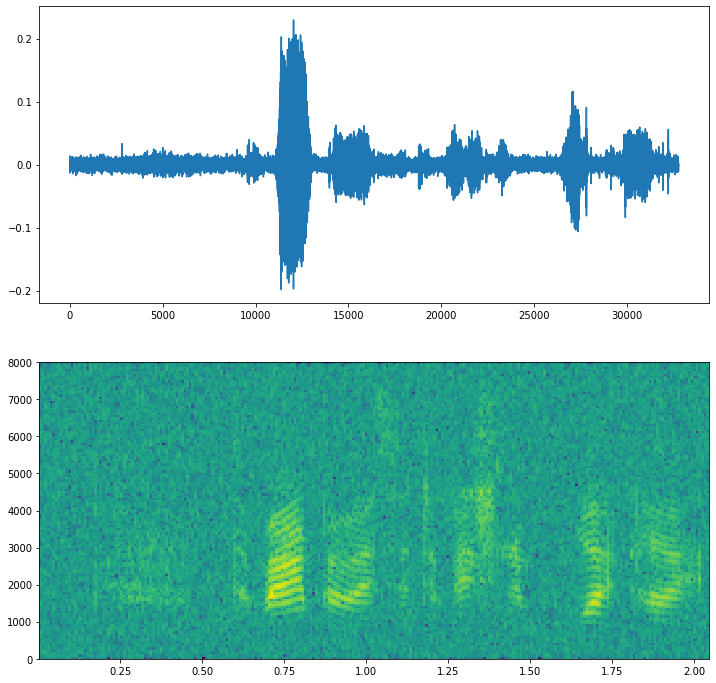

In [8]:
visualize_audio(filtered, 'filtered')

original


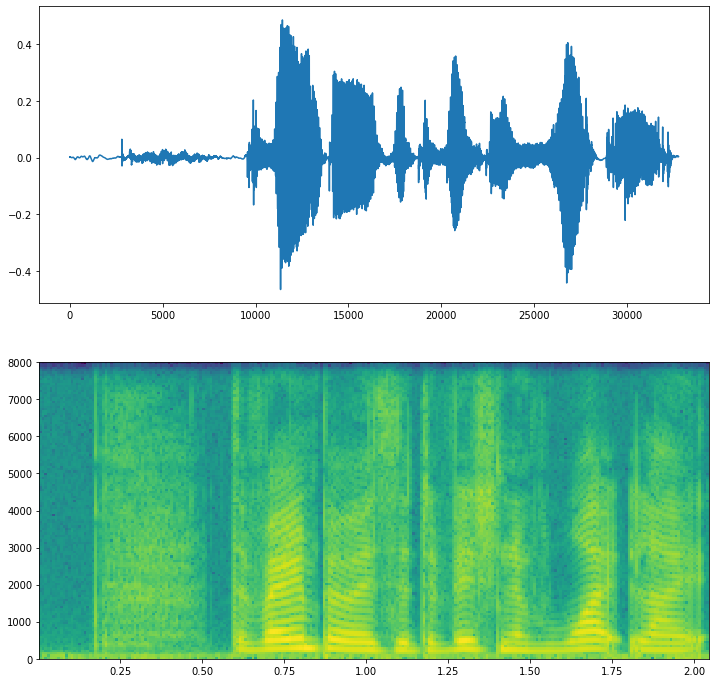

In [6]:
visualize_audio(sample, 'original')